<a href="https://colab.research.google.com/github/Nikitayrf/python/blob/main/Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Базовые функции для работы с данными


In [ ]:
import pandas as pd

In [ ]:
# чтение файла
df = pd.read_csv('sample_data/california_housing_train.csv')

In [ ]:
# вывести первые 5 строк 
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
# вывести последние 5 строк
df.tail()

In [ ]:
# вывести null значение
df.isnull()

In [ ]:
# вывести кол-во пустых ячеек по стоблцам
df.isnull().sum()

In [ ]:
# узнать тип данных столбца
df.dtypes

In [ ]:
# узнать название всех стоблов в таблицу 
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

# Выборка данных

In [ ]:
# Вывести 1 конкретный столбец
df['longitude']

In [ ]:
# Вывести несколько столбцов
df[['longitude', 'latitude']]

In [ ]:
# Задание: Необходимо вывести столбец total_rooms, у которого медианный возраст здания(housing_median_age) меньше 20.
df[df['housing_median_age'] < 20]['total_rooms']

In [ ]:
# Проверка на несколько условий
df[(df['housing_median_age'] < 20) & (df['housing_median_age'] > 10)]['total_rooms']

In [ ]:
# Проверка на несколько условий с выводом нескольких столбцов
df[(df['housing_median_age'] < 20) & (df['housing_median_age'] > 10)][['total_rooms','housing_median_age']]

# Простая статистика

In [ ]:
# Максимальное значение в max()
print(df['population'].max())

35682.0


In [ ]:
# Минимальное значение в min()
print(df['population'].min())

3.0


In [ ]:
# Среднее значение mean()
print(df['population'].mean())

1429.5739411764705


In [ ]:
# Сумма значений в столбце sum()
print(df['population'].sum())

24302757.0


In [ ]:
# Медианное значение нескольких столбцов median()
df[['population', 'total_rooms']].median()

population     1167.0
total_rooms    2127.0
dtype: float64

In [ ]:
# Перцентиль
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Изображаем статистические отношения


**Scatterplot (Точечный график)**
Математическая диаграмма, изображающая значения двух переменных в виде
точек на декартовой плоскости. Библиотека seaborn без труда принимает pandas
**DataFrame**(таблицу). Чтобы изобразить отношения между двумя столбцами
достаточно указать, какой столбец отобразить по оси x, а какой по оси y.

In [ ]:
import seaborn as sns

Изображение точек долготы по отношению к широте:

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

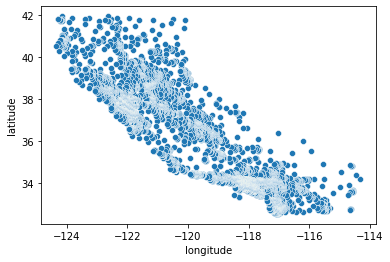

In [ ]:
sns.scatterplot(data=df, x='longitude', y='latitude')

Отношение, чем выше кол-во семей, тем выше кол-во людей и соответсвенно комнат:

<AxesSubplot:xlabel='households', ylabel='population'>

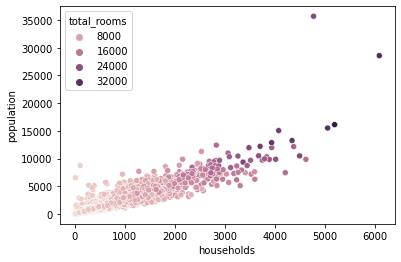

In [ ]:
sns.scatterplot(data=df, x="households", y="population", hue="total_rooms")

<AxesSubplot:xlabel='households', ylabel='population'>

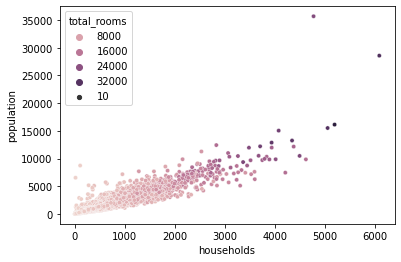

In [ ]:
sns.scatterplot(data=df, x="households", y="population", hue="total_rooms", size=10)

Мы можем визуализировать сразу несколько отношений, используя класс **PairGrid**
внутри **seaborn**. **PairGrid** принимает как аргумент pandas **DataFrame** и
визуализирует все возможные отношения между ними, в соответствии с
выбранным типом графика.

In [ ]:
cols = ['population', 'median_income', 'housing_median_age',
'median_house_value']
g = sns.PairGrid(df[cols])
g.map(sns.scatterplot)

# Линейные графики

Хорошо подойдут, если есть временная или какая-либо иная последовательность и
значения, которые могут меняться в зависимости от нее. Для генерации линейных
графиков в **seaborn** используется **relplo**t функцию. Она также принимает
**DataFrame, x, y** - столбцы.

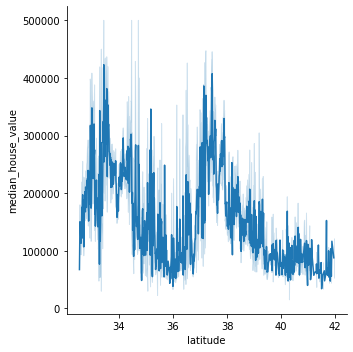

In [ ]:
sns.relplot(x="latitude", y="median_house_value", kind="line", data=df)

Можно видеть, что в определенных местах долготы цена за дома резко
подскакивает.
Попробуем визуализировать **longitude** по отношения к **median_house_value** и поймем
в чем же дело, почему цена так резко подскакивает.

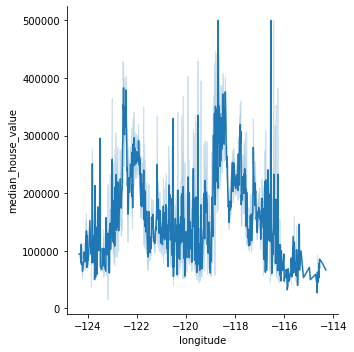

In [ ]:
sns.relplot(x = 'longitude', y = 'median_house_value', kind = 'line', data = df)

Можно видеть, что в определенных местах широты цена за дома также очень
высока.
Используя точечный график можно визуализировать эти отношения с большей
четкостью. Скорее всего резкий рост цен связан с близостью к ценному объекту,
повышающему качество жизни, скорее всего побережью океана или реки.

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

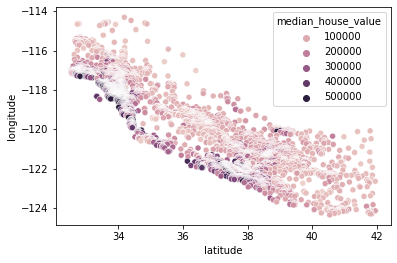

In [ ]:
sns.scatterplot(data=df, x="latitude", y="longitude", hue="median_house_value") 

# Гистограмма

Способ представления табличных данных в графическом виде — в виде столбчатой
диаграммы. По оси x обычно указывают значение, а по оси y - встречаемость(кол-во
таких значений в выборке)

<AxesSubplot:xlabel='median_income', ylabel='Count'>

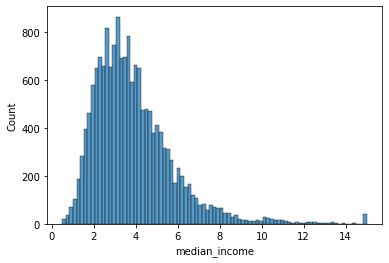

In [ ]:
sns.histplot(data=df, x="median_income")

Можно видеть что у большинства семей доход находится между значениями 2 и 6. И
только очень небольшое количество людей обладают доходом > 10.
Изобразим гистограмму по **housing_median_age.**

<AxesSubplot:xlabel='housing_median_age', ylabel='Count'>

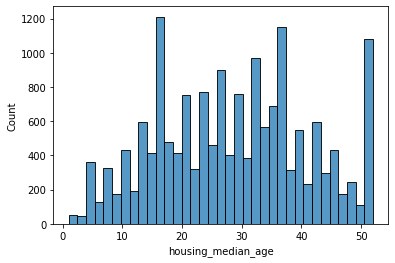

In [ ]:
sns.histplot(data = df, x = 'housing_median_age')

Распределение по возрасту более равномерное. Большую часть жителей
составляют люди в возрасте от 20 до 40 лет. Но и молодежи не мало. Также очень
много пожилых людей > 50 лет медианный возраст.
Давайте посмотрим медианный доход у пожилых жителей.

<AxesSubplot:xlabel='median_income', ylabel='Count'>

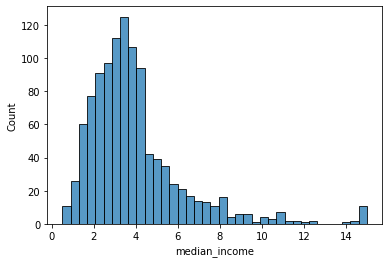

In [ ]:
sns.histplot(data = df[df['housing_median_age'] > 50], x = "median_income")

Большого отличия от популяции в целом не наблюдается. Скорее всего это местные
жители.
Давайте разобьем возрастные группы на 3 категории те кто моложе 20 лет, от 20 до
50 и от 50, чтобы посмотреть влияет ли это на доход.

In [ ]:
df.loc[df['housing_median_age'] <= 20, 'age_group'] = 'Молодые'
df.loc[(df['housing_median_age'] > 20) & (df['housing_median_age'] <= 50),
'age_group'] = 'Ср. возраст'
df.loc[df['housing_median_age'] > 50, 'age_group'] = 'Пожилые'

Что в этом случае происходит внутри таблицы? Добавился новый столбец age_group, в котором будет указана соответствующая категория.

In [ ]:
df.head(n = 1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,age_group
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,Молодые


Применим группировка groupby, чтобы получить среднее значение и plot создание графика

<AxesSubplot:xlabel='age_group'>

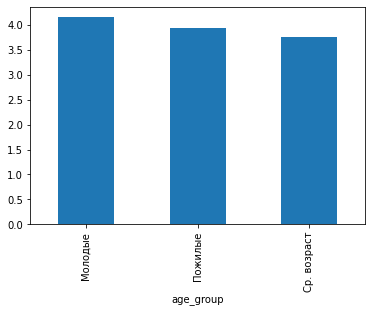

In [ ]:
df.groupby('age_group')['median_income'].mean().plot(kind='bar')

Молодые оказываются самой богатой группой населения. Но отличие в доходе не
значительное.
Seaborn так же позволяет нам смотреть распределение по многим параметрам.
Давайте поделим группы по доходам на 2. Те у кого медианный доход выше 6 и те у
кого меньше. Изобразим дополнительное измерение с помощью оттенка в виде
возрастных групп и групп по доходам.

In [ ]:
df.loc[df['median_income'] > 6, 'income_group'] = 'rich'
df.loc[df['median_income'] < 6, 'income_group'] = 'everyone_else'

In [ ]:
df.head(n=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,age_group,income_group
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,Молодые,everyone_else


<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

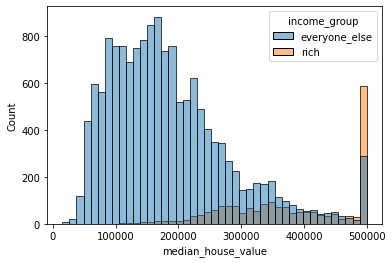

In [ ]:
sns.histplot(data = df, x = 'median_house_value', hue = 'income_group')

# Loc


In [ ]:
df.loc[df['housing_median_age'] <= 20, 'age_group'] = 'Молодые'
df.loc[(df['housing_median_age'] > 20) & (df['housing_median_age'] <= 50),
'age_group'] = 'Ср. возраст'
df.loc[df['housing_median_age'] > 50, 'age_group'] = 'Пожилые'

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'age_group'],
      dtype='object')

In [ ]:
df['age_group']

0            Молодые
1            Молодые
2            Молодые
3            Молодые
4            Молодые
            ...     
16995        Пожилые
16996    Ср. возраст
16997        Молодые
16998        Молодые
16999        Пожилые
Name: age_group, Length: 17000, dtype: object

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,age_group
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,Молодые
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,Молодые
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,Молодые
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,Молодые
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,Молодые
...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,Пожилые
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0,Ср. возраст
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,Молодые
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,Молодые
